# RFCrypto

In [94]:
import matplotlib.pyplot as plt
import pandas as pd

COIN = 'SOLBUSD'
TIME = '30m'

In [3]:
# !python data_loader.py --coin ETHBUSD --time 15m

## Klines

In [95]:
klines = pd.read_csv(f'./klines/{COIN}_{TIME}.csv')
klines = klines.iloc[:,1:]
klines['timestamp'] = pd.to_datetime(klines.timestamp)
klines

,timestamp,open,high,low,close,volume,closetime,quoteassetvolume,numberoftrades,takerbuybaseassetvolume,time
0,2021-03-01 00:00:00,13.1269,13.5974,13.0410,13.5569,23355.73,1614558599999,3.108639e+05,991,12839.40,2021-03-01
1,2021-03-01 00:30:00,13.5844,14.1652,13.5551,14.1386,50269.14,1614560399999,6.984380e+05,1587,21344.68,2021-03-01
2,2021-03-01 01:00:00,14.1390,14.1877,13.7745,13.8490,15802.87,1614562199999,2.207447e+05,642,5751.31,2021-03-01
3,2021-03-01 01:30:00,13.8717,14.0828,13.8382,13.9540,24384.70,1614563999999,3.405352e+05,833,15373.70,2021-03-01
4,2021-03-01 02:00:00,13.9610,14.2682,13.8791,14.2682,27994.18,1614565799999,3.948775e+05,691,13631.81,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...
19358,2022-04-08 21:30:00,112.3000,112.7800,111.5900,111.8200,16830.49,1649455199999,1.885641e+06,4043,5878.29,2022-04-08
19359,2022-04-08 22:00:00,111.8100,112.2500,110.7600,111.2600,28670.36,1649456999999,3.197513e+06,6343,11462.60,2022-04-08
19360,2022-04-08 22:30:00,111.2600,111.6700,110.3500,110.5500,10988.90,1649458799999,1.220322e+06,3376,4590.52,2022-04-08
19361,2022-04-08 23:00:00,110.5500,110.8100,108.1500,108.2000,33062.90,1649460599999,3.616111e+06,9733,12005.82,2022-04-08


## Labeled data

In [96]:
import json

with open(f'./labeled/{COIN}_{TIME}_labels.json', 'r') as fIn:
    labels = json.load(fIn)

labeled_data = labels[0]['annotations'][0]['result']
labeled_data

[{'value': {'start': '2021-03-01 00:00:00',
   'end': '2021-03-01 15:30:00',
   'instant': False,
   'timeserieslabels': ['Regions']},
  'id': '0m6zWD6Puv',
  'from_name': 'predictable',
  'to_name': 'stock',
  'type': 'timeserieslabels',
  'origin': 'manual'},
 {'value': {'start': '2021-03-02 07:00:00',
   'end': '2021-03-02 14:00:00',
   'instant': False,
   'timeserieslabels': ['Regions']},
  'id': '8uDWSPQwrP',
  'from_name': 'predictable',
  'to_name': 'stock',
  'type': 'timeserieslabels',
  'origin': 'manual'},
 {'value': {'start': '2021-03-02 21:30:00',
   'end': '2021-03-03 11:00:00',
   'instant': False,
   'timeserieslabels': ['Regions']},
  'id': 'QMzpDWmyx_',
  'from_name': 'predictable',
  'to_name': 'stock',
  'type': 'timeserieslabels',
  'origin': 'manual'},
 {'value': {'start': '2021-03-03 14:00:00',
   'end': '2021-03-03 18:30:00',
   'instant': False,
   'timeserieslabels': ['Regions']},
  'id': 'zWEfSpcyp7',
  'from_name': 'predictable',
  'to_name': 'stock',
  'ty

In [97]:
dict_labels = {}
count = 0
for value in labeled_data:
    if value['value']['end'] == '0NaN-NaN-NaN NaN:NaN:NaN':
        pass
    else:
        count +=1
        dict_labels[count] = [value['value']['start'], 1]
        count +=1
        dict_labels[count] = [value['value']['end'], 2]

labels = pd.DataFrame.from_dict(dict_labels, orient='index', columns=['timestamp', 'label'])
labels['timestamp'] = pd.to_datetime(labels.timestamp)

labels

,timestamp,label
1,2021-03-01 00:00:00,1
2,2021-03-01 15:30:00,2
3,2021-03-02 07:00:00,1
4,2021-03-02 14:00:00,2
5,2021-03-02 21:30:00,1
...,...,...
486,2022-04-07 11:30:00,2
487,2022-04-06 03:00:00,1
488,2022-04-06 06:00:00,2
489,2022-04-08 13:00:00,1


In [7]:
klines_label = klines.merge(labels, on='timestamp', how='outer')
klines_label = klines_label.fillna(0)

for i, row in klines_label.iterrows():
    if i > 1:
        last_row = klines_label.label.iloc[i-1]
        if last_row == 0 and row.label == 1:
            klines_label.loc[i, 'label'] = 1
        elif last_row == 1 and row.label == 0:
            klines_label.loc[i, 'label'] = 1
        elif last_row == 1 and row.label == 2:
            klines_label.loc[i, 'label'] = 2
        elif last_row == 2 and row.label == 0:
            klines_label.loc[i, 'label'] = 0
        else:
            klines_label.loc[i, 'label'] = 0
    else:
        pass

klines_label = klines_label.replace(2, 1)
klines_label['label'] = klines_label.label.shift(1)
klines_label = klines_label.fillna(0)
# klines['time'] = pd.to_datetime(klines['timestamp'].dt.strftime('%Y-%m-%d'))
klines_label

,timestamp,open,high,low,close,volume,closetime,quoteassetvolume,numberoftrades,takerbuybaseassetvolume,time,label
0,2021-03-01 00:00:00,13.1269,13.5974,13.0410,13.5569,23355.73,1614558599999,3.108639e+05,991,12839.40,2021-03-01,0.0
1,2021-03-01 00:30:00,13.5844,14.1652,13.5551,14.1386,50269.14,1614560399999,6.984380e+05,1587,21344.68,2021-03-01,1.0
2,2021-03-01 01:00:00,14.1390,14.1877,13.7745,13.8490,15802.87,1614562199999,2.207447e+05,642,5751.31,2021-03-01,0.0
3,2021-03-01 01:30:00,13.8717,14.0828,13.8382,13.9540,24384.70,1614563999999,3.405352e+05,833,15373.70,2021-03-01,0.0
4,2021-03-01 02:00:00,13.9610,14.2682,13.8791,14.2682,27994.18,1614565799999,3.948775e+05,691,13631.81,2021-03-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19358,2022-04-08 21:30:00,112.3000,112.7800,111.5900,111.8200,16830.49,1649455199999,1.885641e+06,4043,5878.29,2022-04-08,0.0
19359,2022-04-08 22:00:00,111.8100,112.2500,110.7600,111.2600,28670.36,1649456999999,3.197513e+06,6343,11462.60,2022-04-08,0.0
19360,2022-04-08 22:30:00,111.2600,111.6700,110.3500,110.5500,10988.90,1649458799999,1.220322e+06,3376,4590.52,2022-04-08,0.0
19361,2022-04-08 23:00:00,110.5500,110.8100,108.1500,108.2000,33062.90,1649460599999,3.616111e+06,9733,12005.82,2022-04-08,0.0


## Merge & Feature Eng.

In [63]:
import pandas_ta as pta
import numpy as np

# df = klines_label.merge(greed, left_on='time', right_on='time')
df = klines_label.copy()
df = df[['timestamp', 'open', 'high', 'low', 'close', 'volume', 'numberoftrades', 'label']]

df['candle_hight'] = 100 * (df.high - df.low) / ((df.high + df.low) / 2)
df['price_change'] = df['close'].pct_change() * 100

# UPTREND - 20, 80

df['FASTMA'] = df.close.ewm(20).mean()
df['SLOWMA'] = df.close.ewm(80).mean()
df['FASTSlope'] = np.degrees(np.arctan(df['FASTMA'].diff()/20))
df['SLOWSlope'] = np.degrees(np.arctan(df['SLOWMA'].diff()/80))
df['RSI'] = pta.rsi(df.close)
df['Slope'] = pta.slope(df.close, length=7)
df['AROON'] = pta.aroon(df['high'], df['low'])['AROONU_14']
df['BBAND'] = pta.bbands(df['close'], length=14, std=2, talib=False)['BBP_14_2.0']
df['OBV'] = pta.bbands(close=df['close'], volume=df['volume'])['BBP_5_2.0']
df['MACD'] = pta.macd(close=df['close'])['MACD_12_26_9']

df = df.dropna()
df = df.sort_values('timestamp')
df

,timestamp,open,high,low,close,volume,numberoftrades,label,candle_hight,price_change,FASTMA,SLOWMA,FASTSlope,SLOWSlope,RSI,Slope,AROON,BBAND,OBV,MACD
25,2021-03-01 12:30:00,14.5955,15.0217,14.5856,14.9318,22988.46,628,0.0,2.945895,2.478964,14.514549,14.433145,0.084812,0.016722,61.524063,0.048129,78.571429,0.834275,0.598460,0.271215
26,2021-03-01 13:00:00,14.9301,14.9917,14.7436,14.7695,32010.11,550,0.0,1.668724,-1.086942,14.531131,14.447718,0.047504,0.010437,57.349097,0.027014,71.428571,0.623455,0.408695,0.258672
27,2021-03-01 13:30:00,14.7648,14.8033,14.6709,14.6966,5045.97,316,0.0,0.898413,-0.493585,14.541709,14.458176,0.030303,0.007491,55.526454,0.036757,64.285714,0.505202,0.370763,0.240081
28,2021-03-01 14:00:00,14.6684,14.8575,14.6322,14.8293,26531.21,385,0.0,1.527991,0.902930,14.559798,14.473323,0.051823,0.010848,58.134749,-0.021000,57.142857,0.656051,0.643026,0.233366
29,2021-03-01 14:30:00,14.8492,15.3225,14.8492,15.2786,49684.94,1578,0.0,3.137377,3.029813,14.604331,14.505278,0.127576,0.022886,65.510302,0.035443,100.000000,1.070488,0.962924,0.261287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19358,2022-04-08 21:30:00,112.3000,112.7800,111.5900,111.8200,16830.49,4043,0.0,1.060748,-0.436292,115.887447,119.891853,-0.582599,-0.072263,32.981760,-0.241429,7.142857,0.101691,0.117719,-1.347546
19359,2022-04-08 22:00:00,111.8100,112.2500,110.7600,111.2600,28670.36,6343,0.0,1.336263,-0.500805,115.667092,119.785287,-0.631244,-0.076322,31.199877,-0.477143,0.000000,0.042124,0.144454,-1.445487
19360,2022-04-08 22:30:00,111.2600,111.6700,110.3500,110.5500,10988.90,3376,0.0,1.189082,-0.638145,115.423421,119.671271,-0.698032,-0.081658,29.056477,-0.554286,0.000000,-0.000723,0.151598,-1.562387
19361,2022-04-08 23:00:00,110.5500,110.8100,108.1500,108.2000,33062.90,9733,0.0,2.429668,-2.125735,115.079449,119.529651,-0.985311,-0.101428,23.340878,-0.774286,0.000000,-0.145817,0.043368,-1.823635


## Model

In [64]:
df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'numberoftrades',
       'label', 'candle_hight', 'price_change', 'FASTMA', 'SLOWMA',
       'FASTSlope', 'SLOWSlope', 'RSI', 'Slope', 'AROON', 'BBAND', 'OBV',
       'MACD'],
      dtype='object')

In [65]:
ml = df.copy()

to_remove = ['timestamp', 'numberoftrades', 'FASTMA', 'SLOWMA', 'SLOWSlope', 'FASTSlope', 'open', 'high', 'low', 'close','label']

columns = df.columns
columns = [i for i in columns if i not in to_remove]
columns.append('label')

ml = ml[columns] # label at the end
ml = ml.astype('float32')
ml.describe().T

,count,mean,std,min,25%,50%,75%,max
volume,19338.0,16740.923828,17921.302734,188.500000,6346.173706,11415.851562,20353.544922,367361.812500
candle_hight,19338.0,1.571393,1.220735,0.158043,0.856105,1.239554,1.879378,33.822914
price_change,19338.0,0.017245,1.166731,-16.207804,-0.539245,0.000000,0.549297,17.611103
RSI,19338.0,50.391983,11.580554,10.813188,42.490840,49.941607,58.218199,94.841782
Slope,19338.0,0.004982,0.410542,-4.918571,-0.146000,-0.002321,0.145032,4.265714
AROON,19338.0,46.967480,36.532108,0.000000,7.142857,42.857143,85.714287,100.000000
BBAND,19338.0,0.501056,0.323452,-0.361959,0.239473,0.497177,0.758451,1.362015
OBV,19338.0,0.498768,0.285753,0.000722,0.242100,0.497489,0.756200,0.999800
MACD,19338.0,0.036573,1.226618,-8.210488,-0.413547,-0.002469,0.462550,9.913255
label,19338.0,0.425328,0.494405,0.000000,0.000000,0.000000,1.000000,1.000000


<AxesSubplot:>

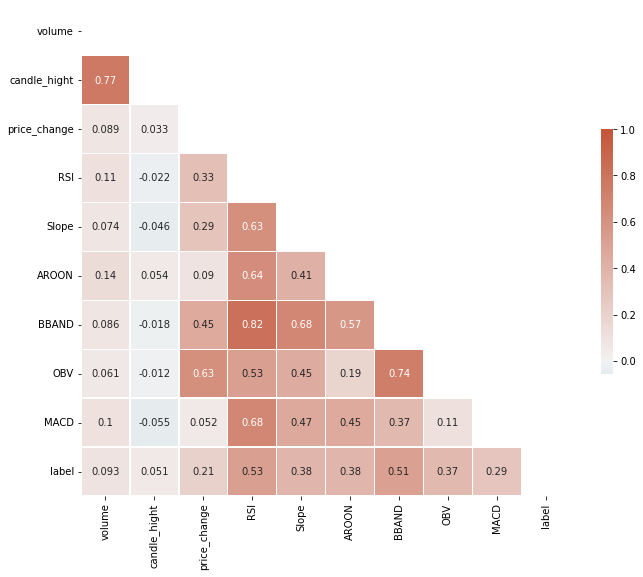

In [66]:
import seaborn as sns

corr = ml.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True,  vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [67]:
# pd.plotting.scatter_matrix(ml, figsize=(10,10), color='black', alpha=0.75, diagonal='kde', grid=True)

In [68]:
# Function from https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [69]:
total_columns = len(ml.columns)

reframed = series_to_supervised(ml, 28, 1)
variable_name = f'var10'

# remove the label column from each time step
columns = []
for columnName, columnData in reframed.iteritems():
    if variable_name in columnName:
        if columnName == variable_name+'(t)':
            pass
        else:
            columns.append(columnName)

reframed = reframed.drop(columns, axis=1)

# remove the last time step but not the label
columns_to_remove = reframed.iloc[:, -total_columns:-1].columns
reframed = reframed.drop(columns_to_remove, axis=1)
reframed

,var1(t-28),var2(t-28),var3(t-28),var4(t-28),var5(t-28),var6(t-28),var7(t-28),var8(t-28),var9(t-28),var1(t-27),...,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t)
53,22988.460938,2.945895,2.478965,61.524063,0.048129,78.571426,0.834275,0.598460,0.271215,32010.109375,...,24881.650391,2.883094,-2.273699,43.164124,-0.051271,78.571426,0.116640,0.060841,0.056665,0.0
54,32010.109375,1.668724,-1.086942,57.349098,0.027014,71.428574,0.623455,0.408695,0.258672,5045.970215,...,30146.779297,3.722364,-2.149575,36.569710,-0.105229,71.428574,-0.092434,0.078931,0.003590,0.0
55,5045.970215,0.898413,-0.493585,55.526455,0.036757,64.285713,0.505202,0.370763,0.240081,26531.210938,...,8068.169922,2.084682,-0.088012,36.330238,-0.099914,64.285713,0.012960,0.219454,-0.039039,0.0
56,26531.210938,1.527991,0.902930,58.134750,-0.021000,57.142857,0.656051,0.643026,0.233366,49684.941406,...,8387.320312,0.856394,0.348861,38.060131,-0.129800,57.142857,0.111029,0.343226,-0.068012,0.0
57,49684.941406,3.137377,3.029813,65.510300,0.035443,100.000000,1.070488,0.962924,0.261287,9962.480469,...,4849.160156,0.823057,0.128888,38.724834,-0.101114,50.000000,0.171534,0.451790,-0.088462,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19358,23464.419922,2.110438,1.360660,48.695782,-0.390000,42.857143,0.157555,0.391406,0.575360,24005.740234,...,8723.200195,1.390057,-0.865037,34.586700,-0.305714,14.285714,0.121420,0.112041,-1.259955,0.0
19359,24005.740234,1.672761,-0.184579,47.660442,-0.317143,35.714287,0.160242,0.426594,0.444094,19238.960938,...,16830.490234,1.060748,-0.436292,32.981758,-0.241429,7.142857,0.101691,0.117719,-1.347546,0.0
19360,19238.960938,1.651922,0.277381,49.398373,-0.261429,28.571428,0.255088,0.607223,0.362514,10260.589844,...,28670.359375,1.336263,-0.500805,31.199877,-0.477143,0.000000,0.042124,0.144454,-1.445487,0.0
19361,10260.589844,0.913855,0.209556,50.733028,-0.264286,21.428572,0.327806,0.728017,0.314410,10923.519531,...,10988.900391,1.189082,-0.638145,29.056477,-0.554286,0.000000,-0.000723,0.151598,-1.562387,0.0


### Train Test Split

In [70]:
from sklearn.model_selection import train_test_split

X = reframed.drop([variable_name+'(t)'], axis=1)
y = reframed[variable_name+'(t)']

X1 = df.drop(['label'], axis=1)
y1 = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
_, X_backtest, _, y_backtest = train_test_split(X1, y1, test_size=0.3, random_state=42, shuffle=False)

print(X_train.shape)
print(y_train.shape)
print(y_train.value_counts())

(13517, 252)
(13517,)
0.0    7605
1.0    5912
Name: var10(t), dtype: int64


### Random Forest

In [16]:
import pickle
model = pickle.load(open(f'./models/{COIN}.sav', 'rb'))

In [17]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

#### Predict and confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[2876,  604],
       [1119, 1194]], dtype=int64)

#### Precision, Recall and F1 Score

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate Precision Score, Recall Score and F1 Score
precision_score_p = precision_score(y_test, y_pred)
print('Precision Score: ', precision_score_p)

recall_score_p = recall_score(y_test, y_pred)
print('Recall Score: ', recall_score_p)

f1_score_p = f1_score(y_test, y_pred)
print('F1 Score: ', f1_score_p)

Precision Score:  0.664071190211346
Recall Score:  0.51621271076524
F1 Score:  0.5808805643395768


#### Precision Recall Curve

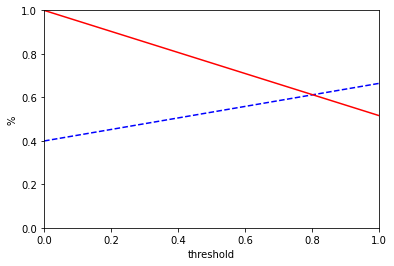

In [20]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'r-', label='Recall')
    plt.xlabel('threshold')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.ylabel('%')

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

plt.show()

#### Roc Curve

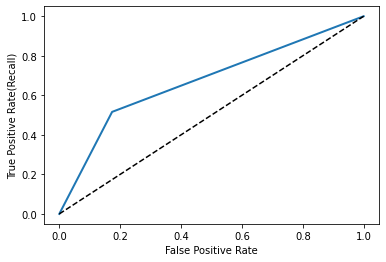

ROC Score:  0.6713247461872177


In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# plot the Roc Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate(Recall)')

plot_roc_curve(fpr, tpr)
plt.show()

print('ROC Score: ', roc_auc_score(y_test, y_pred))

## BackTest & Visualise

In [92]:
t_start = 0
t_end = 5500
threshold = .45
start = start = len(X_backtest) - len(X_test) - 1

yhat = model.predict_proba(X_test)
yhat = [i[1] for i in yhat]

price = X_backtest.iloc[start:,4].to_list()
slowma = X_backtest.iloc[start:,9].to_list()
slowma100 = X_backtest.iloc[start:,10].to_list()
slope = X_backtest.iloc[start:,11].to_list()
slope100 = X_backtest.iloc[start:,12].to_list()

new_order = False
amount = 100
leverage = 1
quantity=0
total=0
bought_price=0
total_earned = []
bought_at = []
amount_plot = []
win_percentage = []
prediction_data = []
price_data = []

for i in range(t_start, t_end):
    try:
        prediction = yhat[i]
        coin_price = price[i]
        price_data.append(coin_price)
        amount_plot.append(amount)
        prediction_data.append(prediction)

        if (new_order is False) and ((prediction > threshold) and (slope100[i] > 0)):
            quantity = round(amount / coin_price, 5)
            bought_price = coin_price
            total_earned.append(0)
            bought_at.append(1)
            new_order = True

        elif (new_order is True) and (((prediction < threshold) and (slope[i] < 0)) or (coin_price < bought_price * .99)):
            total_earn = (quantity * coin_price - amount) * leverage
            win_percentage.append(1 - bought_price / coin_price)
            # amount = amount + total_earn
            total += total_earn
            total_earned.append(total_earn)
            bought_at.append(0)

            new_order = False

        else:
            bought_at.append(0)
            total_earned.append(0)
            pass

    except:
        pass

total

17.07868859999998

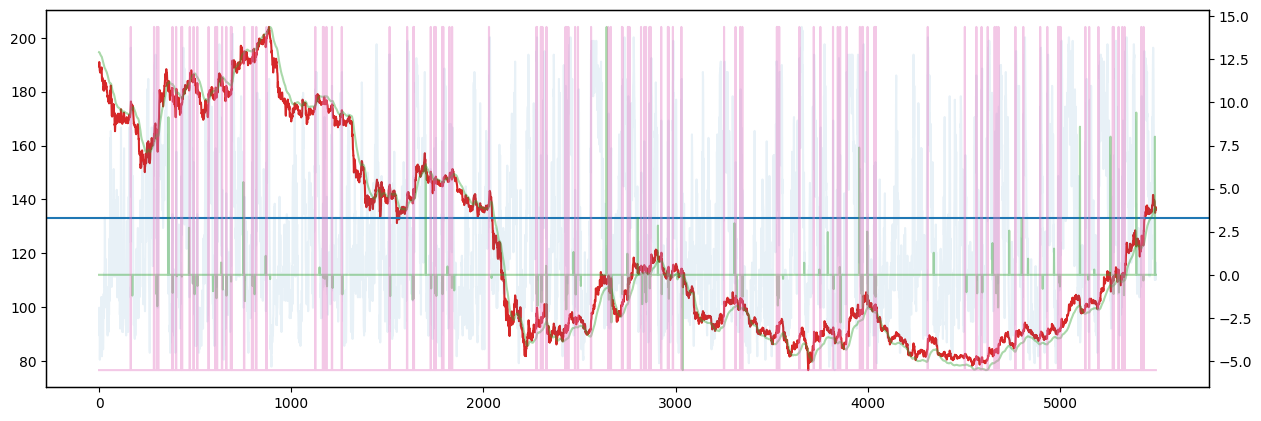

In [93]:
fig, ax1 = plt.subplots(figsize=(15,5), dpi=100)
color = 'tab:red'
ax1.plot(price_data, color=color)
# ax1.axes.yaxis.set_visible(False)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(prediction_data, color=color, alpha=0.1)
ax2.axhline(y=.45, color=color, linestyle='-')
ax2.axes.yaxis.set_visible(False)

ax3 = ax1.twinx()
color = 'tab:green'
ax3.plot(total_earned, color=color, alpha=0.4)
# ax3.axes.yaxis.set_visible(False)

ax3 = ax1.twinx()
color = 'tab:green'
ax3.plot(slowma[t_start:t_end], color=color, alpha=0.4)
ax3.axes.yaxis.set_visible(False)
#
ax3 = ax1.twinx()
color = 'tab:pink'
ax3.plot(bought_at, color=color, alpha=0.4)
ax3.axes.yaxis.set_visible(False)

In [30]:
positive = 0
negative = 0

total_earn = 0
total_loss = 0

for i in total_earned:
    if i == 0:
        pass
    elif i > 0:

        positive = positive + 1
        total_earn = total_earn + i
    else:
        negative = negative + 1
        total_loss = total_loss + i

perc = positive/(positive+negative)

print('Total Trades: ', positive+negative)
print('Total Positive: ', positive, total_earn)
print('Total Negative: ', negative, total_loss)
print('Winning Rate: ', perc)
print('Average Profit: ', np.mean(win_percentage))

Total Trades:  117
Total Positive:  32 112.57977099999992
Total Negative:  85 -95.50108239999994
Winning Rate:  0.27350427350427353
Average Profit:  0.0007083019029739501


In [31]:
pd.Series(win_percentage).sort_values(ascending=False) * 100

51     12.574850
114     8.602325
3       8.377748
106     7.912810
116     7.419688
         ...    
46     -2.046460
53     -2.839205
83     -2.848137
45     -2.972313
69     -5.854562
Length: 117, dtype: float64

#### Feature Importance

[]

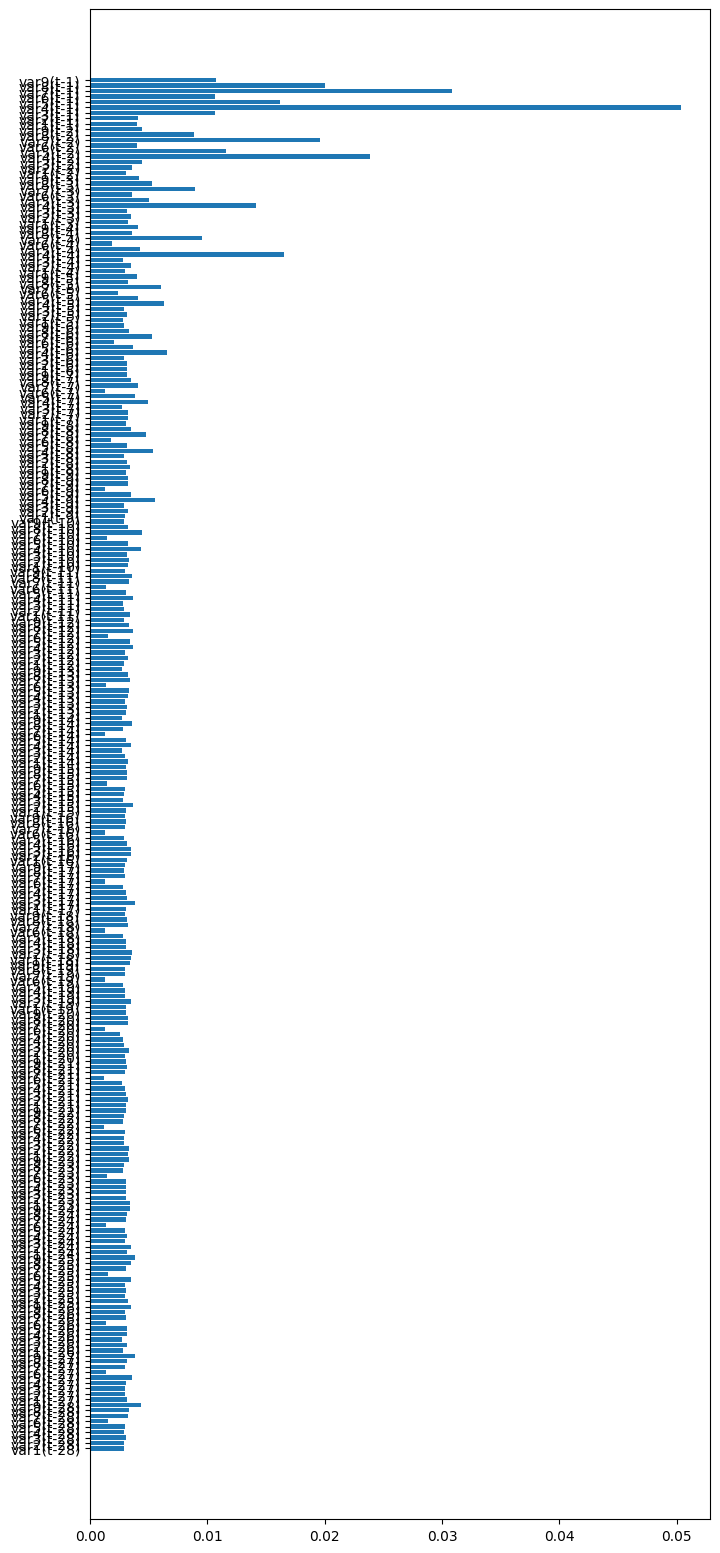

In [32]:
from matplotlib.pyplot import figure
columns = list(X_train.columns)
features_importance = model.feature_importances_
figure(figsize=(8, 20), dpi=100)
plt.barh(columns, features_importance)
plt.plot()

## Save Model!

In [31]:
import pickle
filename = f'./models/{COIN}.sav'
pickle.dump(model, open(filename, 'wb'))

## Test with Real data

In [29]:
from sqlalchemy import create_engine
import json

def db_connection():
    f = open("keys.json")
    data = json.load(f)
    engine = create_engine(data['connection'])

    return engine

with open('keys.json', 'r') as fIn:
    keys = json.load(fIn)

In [18]:
import pandas as pd
# AND timestamp BETWEEN '2022-03-30 09:00:00' AND '2022-03-30 23:00:00'
data = pd.read_sql_query("SELECT timestamp, price, prediction FROM data WHERE COIN = 'ETHBUSD' AND timestamp BETWEEN '2022-04-06 00:00:00' AND '2022-04-06 09:00:00'", db_connection(), index_col='timestamp')
data

,price,prediction
timestamp,,
2022-04-06 00:00:31,3446.33,0.223333
2022-04-06 00:01:03,3446.14,0.230000
2022-04-06 00:01:36,3443.64,0.223333
2022-04-06 00:02:08,3440.78,0.223333
2022-04-06 00:02:40,3439.81,0.220000
...,...,...
2022-04-06 08:57:51,3350.70,0.230000
2022-04-06 08:58:23,3348.48,0.233333
2022-04-06 08:58:55,3345.95,0.226667


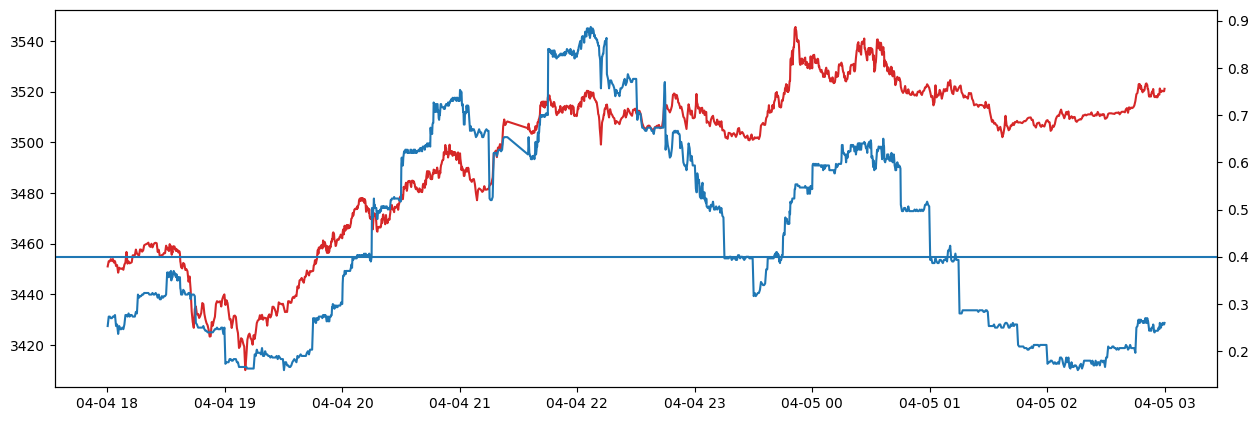

In [17]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(15,5), dpi=100)
color = 'tab:red'
ax1.plot(data.price, color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(data.prediction, color=color)
# ax2.set_ylim(0,1)
ax2.axhline(y=.4, color=color, linestyle='-')

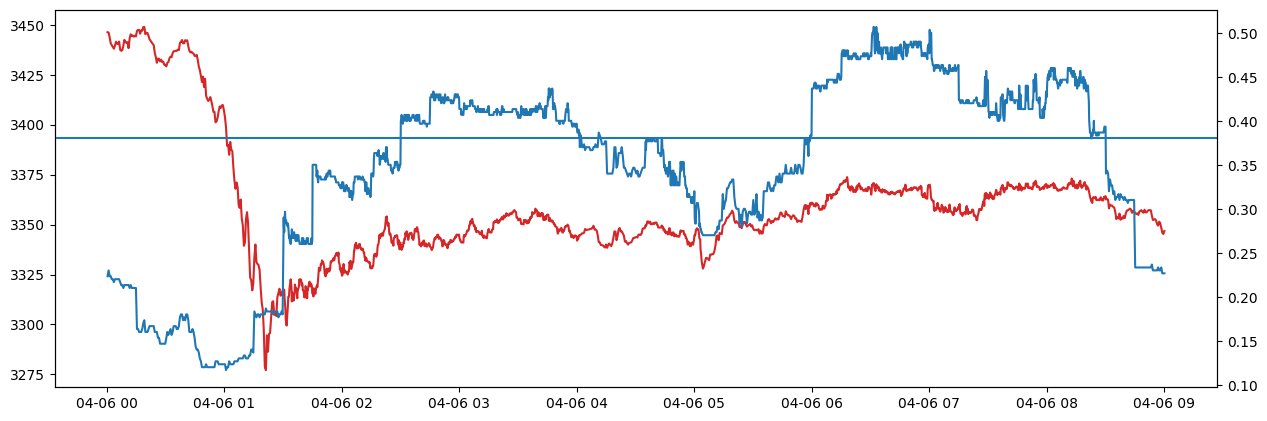

In [20]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(15,5), dpi=100)
color = 'tab:red'
ax1.plot(data.price, color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(data.prediction, color=color)
# ax2.set_ylim(0,1)
ax2.axhline(y=.38, color=color, linestyle='-')